## Below includes tests on well-known functions to make sure my numerical method is valid:

Text(0, 0.5, 'y(t)')

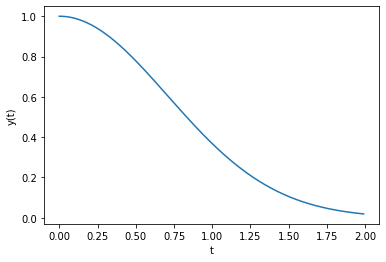

In [58]:
from scipy.integrate import odeint
import numpy as np

def f(y, t):
    """this is the rhs of the ODE to integrate, i.e. dy/dt=f(y,t)"""
    return -2 * y * t

#x0 = 1
y0 = 1             # initial value
a = 0              # integration limits for t
b = 2

t = np.arange(a, b, 0.01)  # values of t for
                          # which we require
                          # the solution y(t)
y2 = odeint(f, y0, t)  # actual computation of y(t)

import matplotlib.pyplot as plt         # plotting of results
plt.plot(t, y2)
plt.xlabel('t'); pylab.ylabel('y(t)')


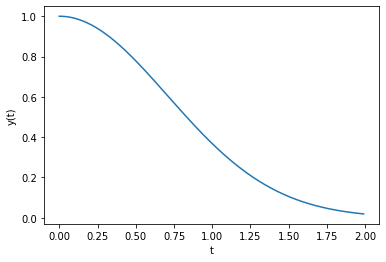

In [84]:
def f(y, t):
    """this is the rhs of the ODE to integrate, i.e. dy/dt=f(y,t)"""
    return -2 * (y * t)

def f2(y, t): # second order derivative
    return -2*(y + t * f(y, t))

def f3(y, t): # third order derivative
    return -2*(f(y,t) + t * f2(y,t) + f(y,t))

#x0 = 1
y0 = 1             # initial value
a = 0              # integration limits for t
b = 2

dt = 0.01
t = np.arange(a, b, dt)  # values of t for
                          # which we require
                          # the solution y(t)
y = [y0]
for i, ti in enumerate(t):
    if i == len(t)-1:
        continue
    y1 = y[i] + f(y[i] , ti)*dt + 1/2 * f2(y[i], ti)*dt*dt + 1/6 * f3(y[i], ti) *(dt**3)
    y.append(y1)
    
import matplotlib.pyplot as plt         # plotting of results
plt.plot(t, y)
plt.xlabel('t'); pylab.ylabel('y(t)')
plt.show()

In [76]:
print(y,"\n\n", [float(i) for i in y2],"\n\n", [np.exp(-i**2) for i in t])

[1, 0.9999, 0.9996000699946668, 0.9991003899010155, 0.9984012593762107, 0.997503097518079, 0.9964064424464171, 0.9951119507656833, 0.9936203969098217, 0.991932672370135, 0.9900497848072836, 0.9879728570486485, 0.9857031259724567, 0.9832419412802186, 0.9805907641591849, 0.977751165836678, 0.9747248260283, 0.971513531282163, 0.9681191732214255, 0.9645437466875564, 0.9607893477868756, 0.9568581718430512, 0.9527525112583493, 0.9484747532865556, 0.9440273777205954, 0.9394129544979846, 0.9346341412273501, 0.9296936806393484, 0.9245943979654022, 0.9193391982477608, 0.9139310635844636, 0.9083730503128628, 0.9026682861354212, 0.8968199671915649, 0.8908313550794196, 0.8847057738313083, 0.8784466068469265, 0.8720572937881439, 0.8655413274394099, 0.8589022505377601, 0.8521436525764318, 0.8452691665861088, 0.8382824658978131, 0.8311872608914547, 0.8239872957340437, 0.8166863451115434, 0.8092882109583249, 0.8017967191881513, 0.7942157164305793, 0.7865490667766308, 0.7788006485375327, 0.7709743510202

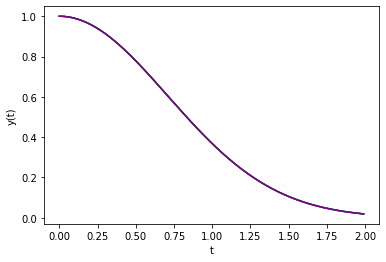

In [85]:
plt.plot(t, y, color= "blue")
plt.plot(t, y2, color = "green")
plt.plot(t, [np.exp(-i**2) for i in t], color = "purple")
plt.xlabel('t'); pylab.ylabel('y(t)')
plt.show()

## Now time for the drag model:

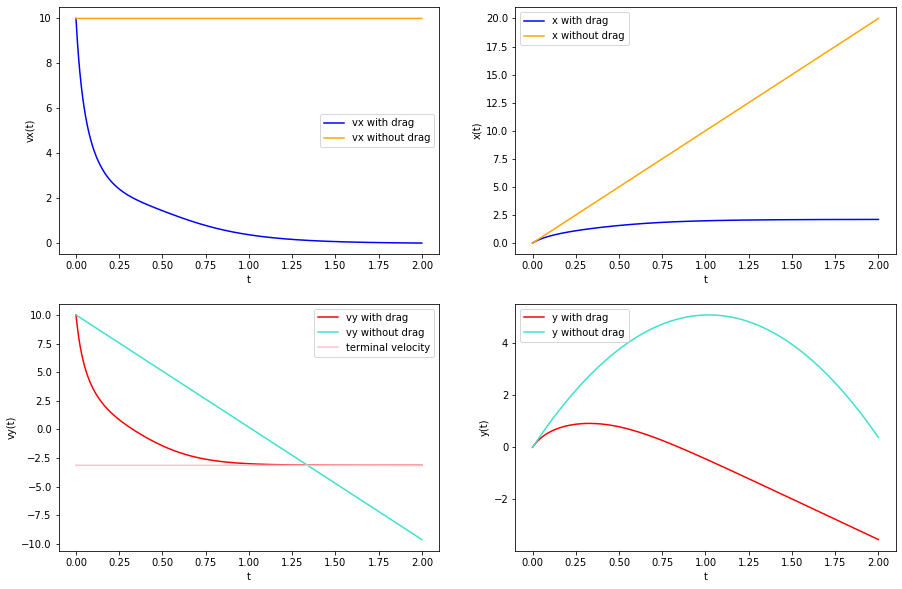

Range:1.910337590844037 meters. Flight time: 0.8474 seconds
(assuming y = 0 is the ground)


In [184]:
import numpy as np, matplotlib.pyplot as plt

m = 1
c = 1
x0 = 0
y0 = 0
vx0 = 10
vy0 = 10
start_t = 0
end_t = 2
dt = 0.0001
g = 9.81

t_list = np.arange(start_t, end_t, dt)
vx_list, vy_list = [vx0], [vy0]
x_list, y_list = [x0], [y0]

def ax(vx, vy, t):
    return -c/m * np.sqrt(vx*vx + vy*vy) * vx

def ay(vx, vy, vt):
    return -c/m * np.sqrt(vx*vx + vy*vy) * vy - g
vter = -np.sqrt(m*g / c)

for i, t in enumerate(t_list[1:]):
    vx_list.append( vx_list[i] + ax(vx_list[i], vy_list[i], t)*dt )
    vy_list.append( vy_list[i] + ay(vx_list[i], vy_list[i], t)*dt )
    x_list.append( x_list[i] + vx_list[i] * dt )
    y_list.append( y_list[i] + vy_list[i] * dt )
    
plt.figure(figsize = (15,10))
plt.subplot(2,2,1)
plt.plot(t_list, vx_list, color = "blue", label = "vx with drag")
plt.plot(t_list, [vx0 for i in t_list], color = "orange", label = "vx without drag")
plt.legend()
plt.ylabel("vx(t)")
plt.xlabel("t")
plt.subplot(2,2,3)
plt.plot(t_list, vy_list, color = "red", label = "vy with drag")
plt.plot(t_list, [vy0-g*t for t in t_list], color = "turquoise", label = "vy without drag")
plt.plot(t_list, [vter for i in t_list], color = "pink", label = "terminal velocity")
plt.ylabel("vy(t)")
plt.xlabel("t")
plt.legend()

plt.subplot(2,2,2)
plt.plot(t_list, x_list, color = "blue", label = "x with drag")
plt.plot(t_list, [x0 + vx0*t for t in t_list], color = "orange", label = "x without drag")
plt.ylabel("x(t)")
plt.xlabel("t")
plt.legend()
plt.subplot(2,2,4)
plt.plot(t_list, y_list, color = "red", label = "y with drag")
plt.plot(t_list , [y0 + vy0*t - g*t*t*.5 for t in t_list], color = "turquoise", label = "y without drag")
plt.ylabel("y(t)")
plt.xlabel("t")
plt.legend()
plt.show()

y_lowest_index = y_list.index(min([abs(y) for y in y_list[10:]]))
x_range = x_list[y_lowest_index]
t_range = t_list[y_lowest_index]
print(f"Range:{x_range} meters. Flight time: {t_range} seconds.\n(assuming y = 0 is the ground)")